In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd ../../..

/Users/dave/Library/CloudStorage/OneDrive-PolitecnicodiMilano/PhD/Repositories/DT-rse


## Combination of the temperature and current signals to generate the ground dataset

Here we decide how to configure an experiment with a shift of temperature (from 40 to 10) to evaluate the adaptation of the OL framework to capture the switch of operating regions. In this notebook, we **build the ground dataset**.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
from scipy import signal

from ernesto.postprocessing.visualization import ernesto_plotter
from ernesto.postprocessing.metrics import compute_metrics, _mse

In [3]:
def sigmoid(x, u=40, l=10, k=0.3, c=450000):
    """
    param u: Upper bound
    param l: Lower bound
    param k: Slope factor
    param c: Center point
    param x: Domain points
    """
    return u - (u-l)/(1+np.exp(-k*(x-c)))

In [4]:
x = np.linspace(0, 900000, 900000)
i = 20 * signal.square(2 *np.pi * x / 1500)
temp = sigmoid(x, k=0.00002)

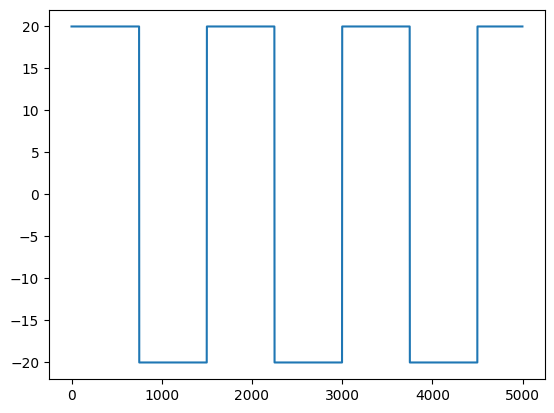

In [5]:
plt.plot(i[:5000])

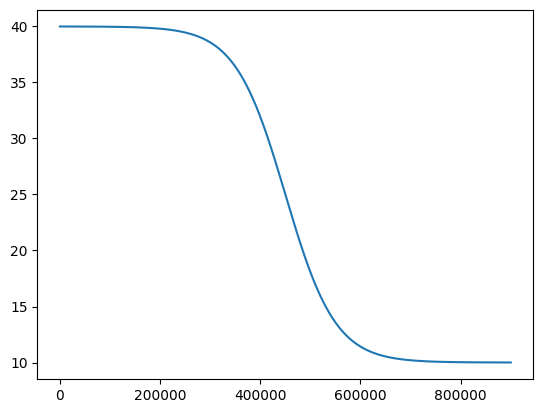

In [6]:
plt.plot(temp)

In [7]:
df_ground = pd.DataFrame(columns=['Current [A]', 'Temp amb [degC]'])

In [8]:
df_ground['Current [A]'] = i
df_ground['Temp amb [degC]'] = temp
df_ground['Time'] = range(900000)

In [9]:
df_ground

,Current [A],Temp amb [degC],Time
0,20.0,39.996298,0
1,20.0,39.996298,1
2,20.0,39.996298,2
3,20.0,39.996298,3
4,20.0,39.996298,4
...,...,...,...
899995,-20.0,10.003702,899995
899996,-20.0,10.003702,899996
899997,-20.0,10.003702,899997
899998,-20.0,10.003702,899998


In [10]:
#df_ground.to_csv("notebooks/ol_new/regionShiftExperiment/region_shift_ground.csv", index=False)

## Evaluation of ground generated for OL experiment

In [81]:
folder = "data/output/driven/"
folder = folder + 'region_shift_experiment/ground_for_OL/2025_07_16-15_58_10/'
path = Path(folder)

In [82]:
grounds = [f for f in os.listdir(path) if f.startswith('ground')]
sorted(grounds)
df_ground = pd.concat((pd.read_csv(path / f) for f in sorted(grounds)), ignore_index=True)

In [83]:
sim_datasets = [f for f in os.listdir(path) if not f.startswith('ground')]

if '.DS_Store' in sim_datasets:
    sim_datasets.remove('.DS_Store')
if 'plots' in sim_datasets:
    sim_datasets.remove('plots')

sorted(sim_datasets)
df_sim = pd.concat((pd.read_csv(path / f) for f in sorted(sim_datasets)), ignore_index=True)
df_sim['current'] *= -1

In [84]:
df_ground

,current,t_amb,time
0,20.0,313.146298,0
1,20.0,313.146298,1
2,20.0,313.146298,2
3,20.0,313.146298,3
4,20.0,313.146298,4
...,...,...,...
899994,-20.0,283.153702,899994
899995,-20.0,283.153702,899995
899996,-20.0,283.153702,899996
899997,-20.0,283.153702,899997


In [85]:
df_sim

,time,soc,soh,c_max,voltage,current,power,v_oc,r0,r1,c1,v_r0,v_rc,i_r1,i_c,temperature,heat,t_amb,dVoc_dT
0,-1,0.500000,1.0,20.0,0.000000,-0.0,0.000000,0.000000,0.001834,0.002070,26290.432975,0.000000,0.000000,0.000000,0.000000,313.150000,0.000000,313.146298,-0.000168
1,0,0.500278,1.0,20.0,3.742622,20.0,74.852445,3.705200,0.001834,0.002070,26290.432975,-0.036675,-0.000747,-0.360958,-19.639042,313.149391,0.733775,313.146298,-0.000168
2,1,0.500556,1.0,20.0,3.743500,20.0,74.870005,3.705345,0.001834,0.002069,26285.569978,-0.036675,-0.001481,-0.715756,-19.284244,313.149925,0.734560,313.146298,-0.000010
3,2,0.500833,1.0,20.0,3.744364,20.0,74.887287,3.705489,0.001834,0.002068,26281.136844,-0.036674,-0.002201,-1.064514,-18.935486,313.150424,0.735819,313.146298,-0.000010
4,3,0.501111,1.0,20.0,3.744784,20.0,74.895673,3.705200,0.001834,0.002070,26290.432975,-0.036675,-0.002908,-1.405374,-18.594626,313.150891,0.737592,313.146298,-0.000010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,899994,0.501389,1.0,20.0,3.524413,-20.0,-70.488269,3.697309,0.004074,0.004619,12248.723521,0.081489,0.091406,19.789172,0.210828,283.209753,3.438640,283.153702,-0.000010
899996,899995,0.501111,1.0,20.0,3.524247,-20.0,-70.484939,3.697160,0.004075,0.004620,12247.049534,0.081490,0.091423,19.789190,0.210810,283.209763,3.438995,283.153702,-0.000010
899997,899996,0.500833,1.0,20.0,3.524080,-20.0,-70.481610,3.697012,0.004075,0.004621,12245.375548,0.081491,0.091440,19.789208,0.210792,283.209774,3.439351,283.153702,-0.000010
899998,899997,0.500556,1.0,20.0,3.523914,-20.0,-70.478280,3.696863,0.004075,0.004622,12243.701562,0.081491,0.091458,19.789226,0.210774,283.209784,3.439706,283.153702,-0.000010


In [86]:
comparison_params = {
    'dfs': [df_sim[1:]], 
    'variables': ['temperature', 'voltage', 'r0', 'r1', 'c1', 'current'], 
    'x_axes': ['time'] * 10,
    'labels': ['Simulated'],
    'x_labels': ['Time [s]'] * 10,
    'y_labels': [' Temperature [K]', 'Voltage [V]', r'$R_0 [\Omega]$', r'$R_1 [\Omega]$', '$C_1 [Ah]$', 'Current [A]'],
    'markers': [''] * 10,
    'line_styles': ['-'] * 10,
    'save_fig': False,
    'sampling_rate': 10000,
    'colors': ['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000'],
    'plot_type': 'line',
    'dest': path, 
    'fig_name': 'pv_test',
    'pic_format': 'pdf',
    'save_extend_bbox': (1.5,1.5),
    'figsize': (12, 4),
    'tick_font_size': 20,
    'label_font_size': 22,
    'legend_font_size': 18,
    'alphas':[1] * 5
}

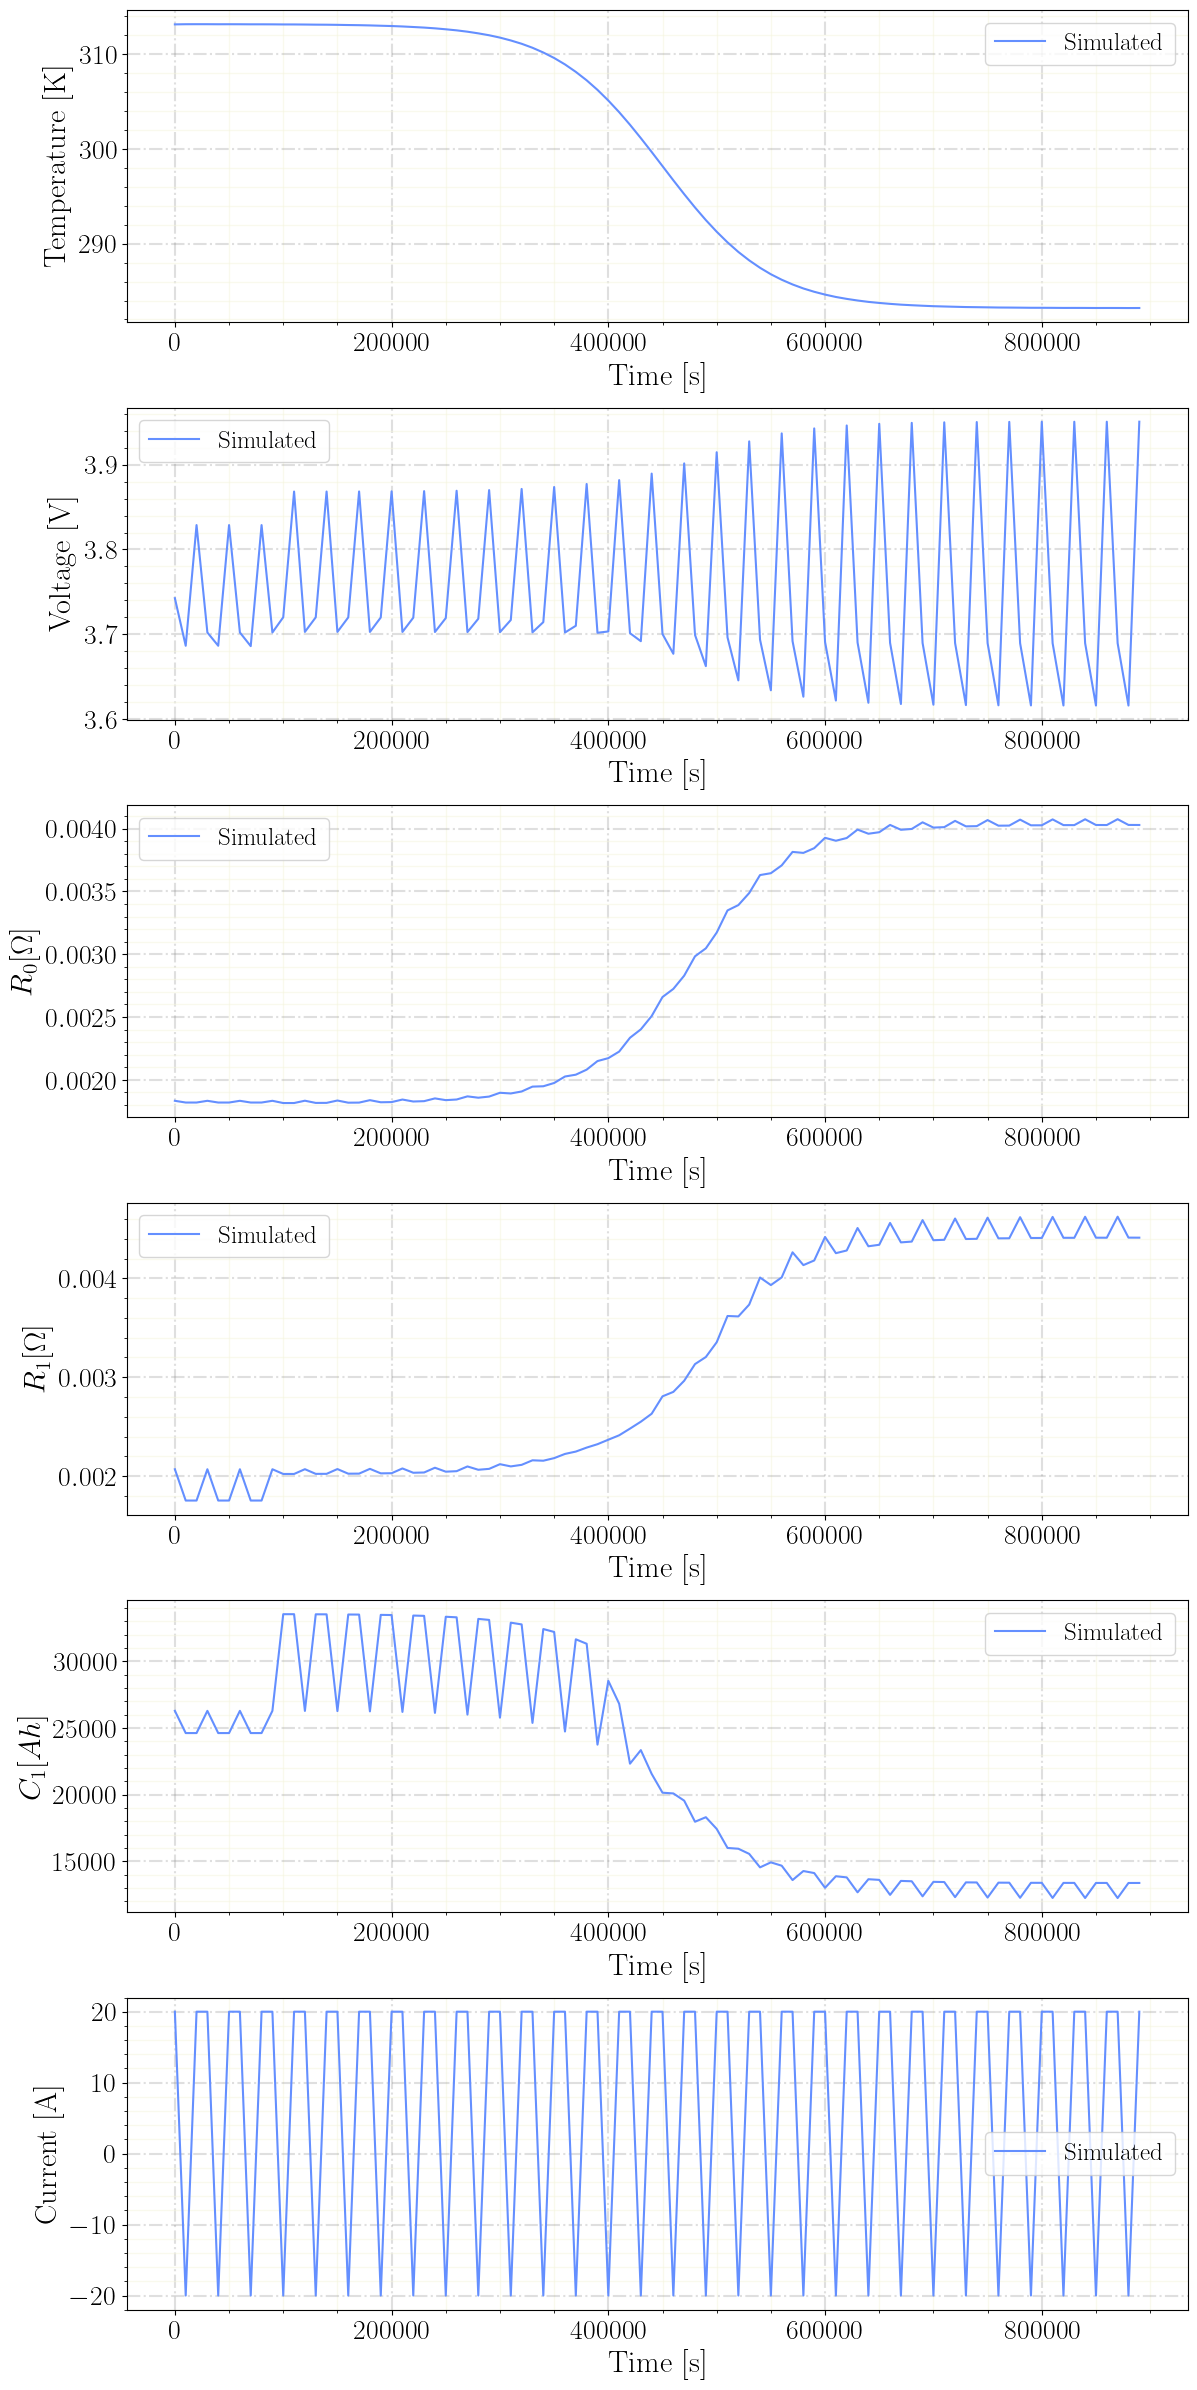

In [87]:
ernesto_plotter(**comparison_params)

In [88]:
#df_sim[1:].to_csv("region_shift_ground.csv", index=False)